In [84]:
import torch
from torch import nn
from torch.nn import functional as F
from torch import optim
from dlc_practical_prologue import *
from projet1_helpers import *
import auxiliary_loss
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Baseline Training accuracy is 0.982 
Baseline Test accuracy is 0.844 
Baseline Training accuracy is 0.998 
Baseline Test accuracy is 0.876 
Baseline Training accuracy is 0.316 
Baseline Test accuracy is 0.309 
Baseline Training accuracy is 0.879 
Baseline Test accuracy is 0.748 
Baseline Training accuracy is 0.999 
Baseline Test accuracy is 0.863 
Baseline Training accuracy is 0.701 
Baseline Test accuracy is 0.605 
Baseline Training accuracy is 0.678 
Baseline Test accuracy is 0.641 
Baseline Training accuracy is 0.878 
Baseline Test accuracy is 0.741 
Baseline Training accuracy is 0.878 
Baseline Test accuracy is 0.749 
Baseline Training accuracy is 0.998 
Baseline Test accuracy is 0.88 
The accuracy of the model is 0.7256 ± 0.0307 


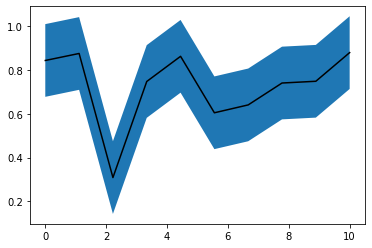

In [93]:
accuracies = []
mini_batch_size = 100
for k in range(10):
    train_input, train_target, test_input, test_target = load_data(one_hot_labels = False, normalize = True, flatten = False)
    train_input = torch.functional.F.avg_pool2d(train_input, kernel_size = 2)
    test_input = input = torch.functional.F.avg_pool2d(test_input, kernel_size = 2)
    
    train_input = train_input.view(train_input.size(0), -1)
    test_input = test_input.view(test_input.size(0),  -1)

    model = auxiliary_loss.MLP_num_pred()
    auxiliary_loss.train_MLP_num_pred(model, train_input, train_target, 25, 100, lr=0.5)
    print(f"Baseline Training accuracy is {auxiliary_loss.accuracy_num_pred(model,train_input,train_target, mini_batch_size)} ")
    test_accuracy = auxiliary_loss.accuracy_num_pred(model, test_input, test_target, mini_batch_size)
    accuracies.append(test_accuracy)
    print(f"Baseline Test accuracy is {test_accuracy} ")

accs = torch.Tensor(accuracies)
print(f"The accuracy of the model is {accs.mean():.4f} ± {accs.var():.4f} ")

plot_performance(accuracies,10)

--------------------------------------------------  
 Iteration 0 
 
Baseline Training accuracy is 0.539 
Baseline Test accuracy is 0.565 
--------------------------------------------------  
 Iteration 1 
 
Baseline Training accuracy is 0.543 
Baseline Test accuracy is 0.577 
--------------------------------------------------  
 Iteration 2 
 
Baseline Training accuracy is 0.573 
Baseline Test accuracy is 0.533 
--------------------------------------------------  
 Iteration 3 
 
Baseline Training accuracy is 0.451 
Baseline Test accuracy is 0.46 
--------------------------------------------------  
 Iteration 4 
 
Baseline Training accuracy is 0.538 
Baseline Test accuracy is 0.561 
--------------------------------------------------  
 Iteration 5 
 
Baseline Training accuracy is 0.541 
Baseline Test accuracy is 0.508 
--------------------------------------------------  
 Iteration 6 
 
Baseline Training accuracy is 0.461 
Baseline Test accuracy is 0.473 
----------------------------

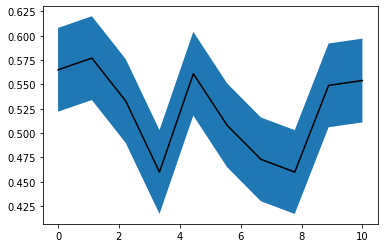

In [91]:

accuracies = []
mini_batch_size = 100
for i in range(10):
    print("-"*50,f" \n Iteration {i} \n ")
    # Generate the pairs
    train_input, train_target, train_classes, test_input, test_target, test_classes = generate_pair_sets(1000)
    
    # flatten
    train_input = train_input.view(train_input.size(0), 2, -1)
    test_input = test_input.view(test_input.size(0), 2, -1)
    
    # define the model
    model =  auxiliary_loss.MLP_aux_loss() 
    
    # train model
    auxiliary_loss.train_MLP_aux(model, train_input, train_target, train_classes, 25, mini_batch_size, aux_loss=True)
    print(f"Baseline Training accuracy is {auxiliary_loss.accuracy(model,train_input,train_target)} ")
    test_accuracy = auxiliary_loss.accuracy(model,test_input,test_target)
    accuracies.append(test_accuracy )
    print(f"Baseline Test accuracy is {test_accuracy} ")

accs = torch.Tensor(accuracies)
print(f"The accuracy of the model is {accs.mean():.4f} ± {accs.var():.4f} ")

plot_performance(accuracies,10)
